Laden Sie den Datensatz
‚herford_weather.csv‘ . Er entstammt der
Open Meteo Api und enthält
We erdaten zur Loka on Herford.
a)
 Formen Sie den Datensatz in eine
Zeitreihe um, indem Sie den
Zeitstempel in einen Date Time –
Datentyp dtype('<M8[ns]‘)
umformen und als Index setzen.
Erzeugen Sie den folgenden
DataFrame (mind. Ansicht der
ersten 5 Zeilen und Spalten ) und
zeichnen Sie ein Liniendiagramm
für die Temperaturwerte in 2m
über dem Boden  (1)

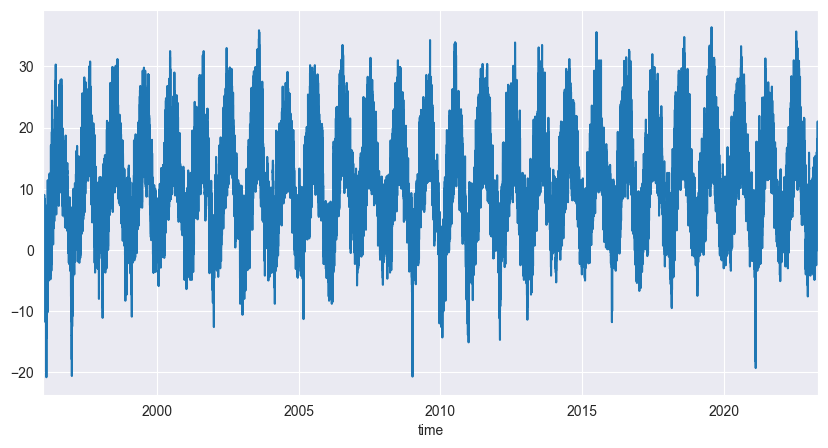

In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("herford_weather.csv")

df['time'] = pd.to_datetime(df['time'])         #time zu datatype datetime ändern

df.set_index('time',inplace=True)          #index zu time ändern

df['temperature_2m (°C)'].plot(figsize=(10, 5)) #plotten
#plt.xlabel("time")
#plt.ylabel("Temperature (°C)")
plt.show()


b) Erzeugen Sie einen
Datensatz, der nur die
täglichen Mitelwerte für
2022 enthält (Abb oben) und
stellen Sie wieder die
Temperatur in 2 m
Bodenhöhe einmal für
stündliche Werte (links) und
einmal für die täglichen
Mitelwerte(rechts) dar.

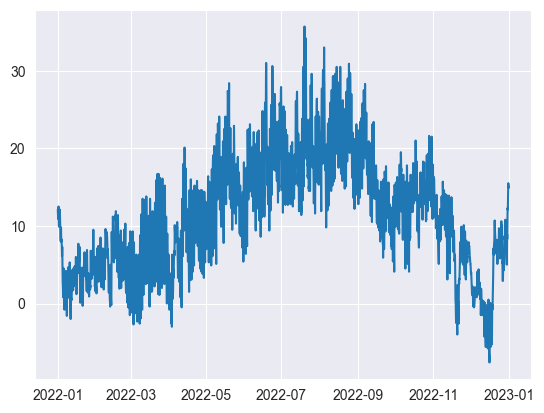

In [373]:
# --- B ---
df_2022 = df[df.index.year == 2022]             # nur 2022

plt.plot(df_2022["temperature_2m (°C)"])        #plotten

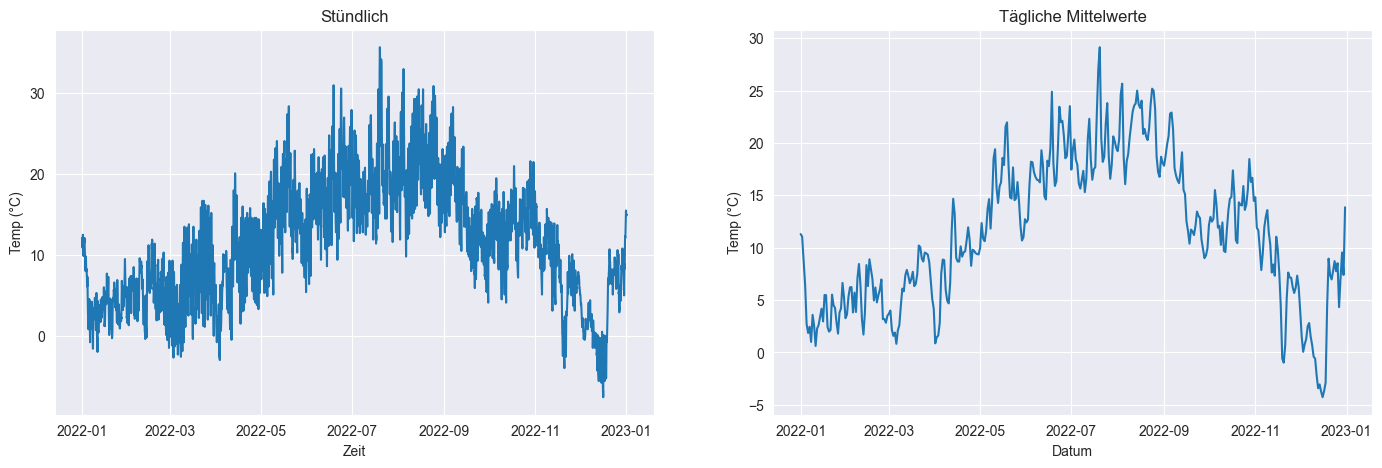

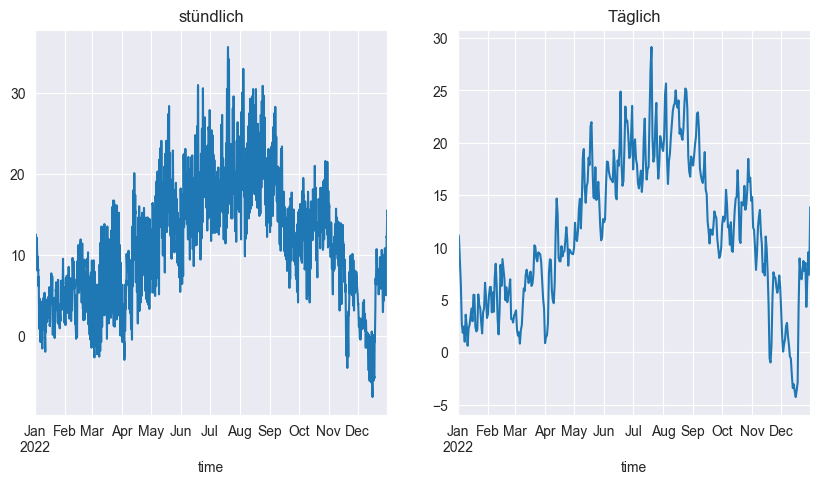

In [374]:
# 2 nebeneinander
plt.figure(figsize=(17,5))                      # Gesamtgröße für zwei Plots
plt.subplot(1,2,1)                              #pos 1 2 1

plt.plot(df_2022["temperature_2m (°C)"])
plt.title("Stündlich")
plt.xlabel("Zeit")
plt.ylabel("Temp (°C)")

#rechte figure
df_daily_2022 = df_2022.resample("D").mean()         # Tagesmittel

plt.subplot(1,2,2)                              # Plot 2 (rechts)
plt.plot(df_daily_2022["temperature_2m (°C)"])
plt.title("Tägliche Mittelwerte")
plt.xlabel("Datum")
plt.ylabel("Temp (°C)")

#plt.tight_layout()                  # verhindert Überlappungen
plt.show()
#besser:
fig,(axis1,axis2) = plt.subplots(1,2, figsize=(10,5))
df_2022["temperature_2m (°C)"].plot(ax=axis1,title="stündlich")
df_daily_2022["temperature_2m (°C)"].plot(ax=axis2,title="Täglich")
plt.show()

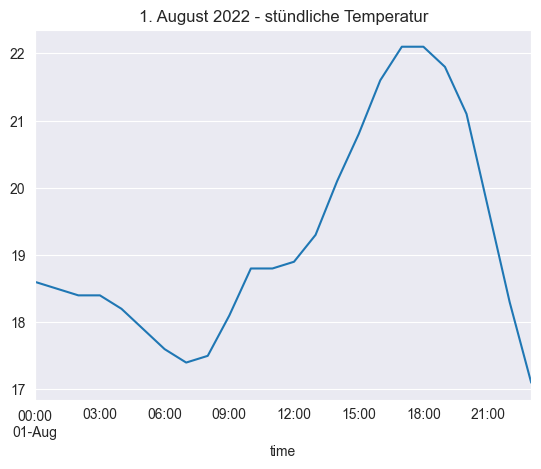

In [375]:
# 2 --- A --- 1 aug 2022 darstellen
df_august = df.loc['2022-08-01'].copy()
df_august = df_august.resample("h").mean() # Tagesmittel

df_august["temperature_2m (°C)"].plot()

plt.title("1. August 2022 - stündliche Temperatur")
plt.show()

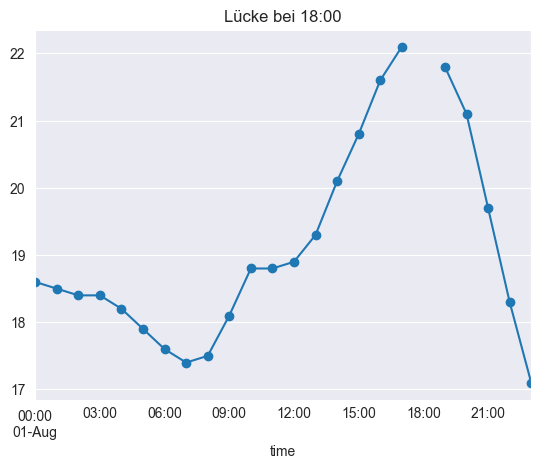

In [376]:
# --- B --- 18 uhr removen
df_august.loc["2022-08-01 18:00:00",'temperature_2m (°C)']= np.nan
df_august['temperature_2m (°C)'].plot(marker='o', title="Lücke bei 18:00")
plt.show()

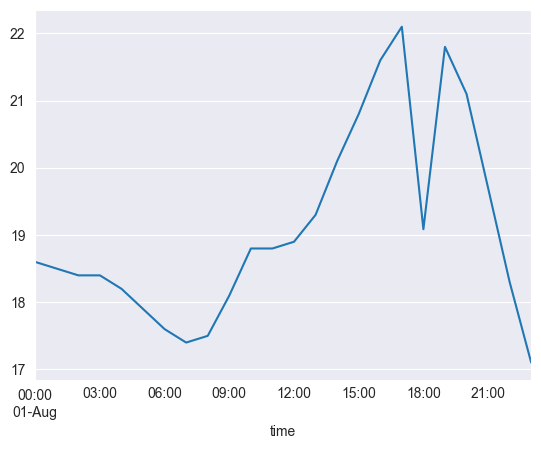

In [377]:
# --- C --- Wert mit globalem Mittelwert von 1aug auffüllen
# copy da in d mit anderem wert aufgefüllt werden soll
df_august_c = df_august.copy()

cmean = cmean = df_august_c.loc['2022-08-01', 'temperature_2m (°C)'].mean()

df_august_c.loc["2022-08-01 18:00:00",'temperature_2m (°C)']=cmean


df_august_c['temperature_2m (°C)'].plot()
plt.show()


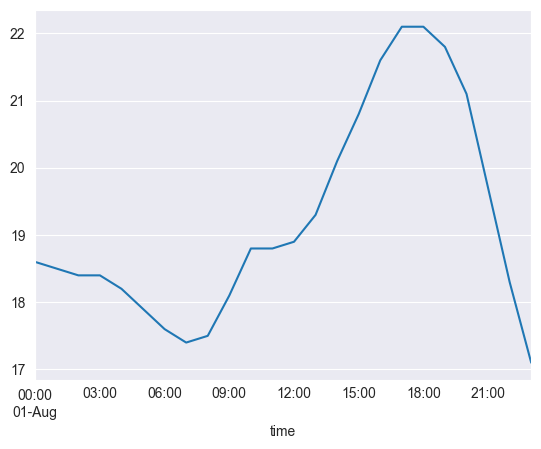

In [378]:
# --- d --- auffüllen mit lag 1
df_august_d = df_august.ffill()

df_august_d['temperature_2m (°C)'].plot()
plt.show()

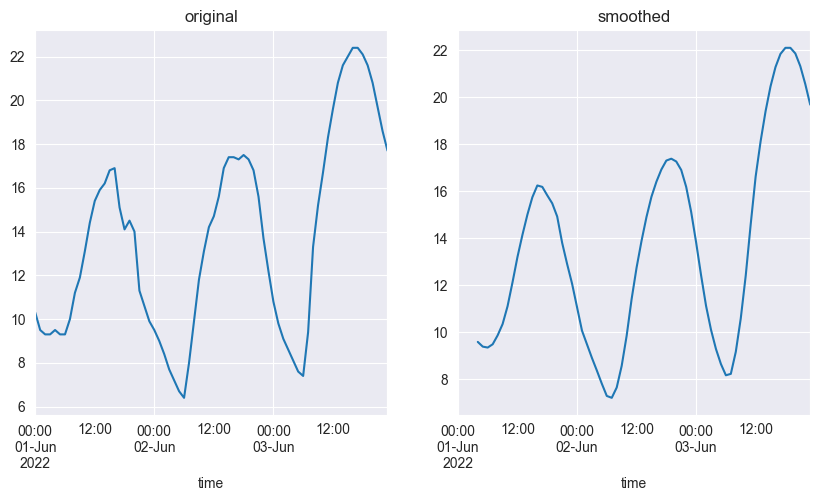

In [379]:
# --- 3 ---

df_juni = df.loc['2022-06-01':'2022-06-03' ].copy()
df_juni_smoothed = df_juni['temperature_2m (°C)'].rolling(window=5).mean()

fig, (axi1 ,axi2) = plt.subplots(1,2, figsize=(10,5))
df_juni['temperature_2m (°C)'].plot(ax=axi1,title="original")

#df_juni_smoothed['temperature_2m (°C)'].plot(ax=axi1,title="smoothed")
# ^ist series deswegen ohne "temp"...
df_juni_smoothed.plot(ax=axi2, title="smoothed")
plt.show()